In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Loading the data set

In [2]:
from sklearn.datasets import load_iris

X, y = load_iris(as_frame=True, return_X_y=True)

2. Data Exploration

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


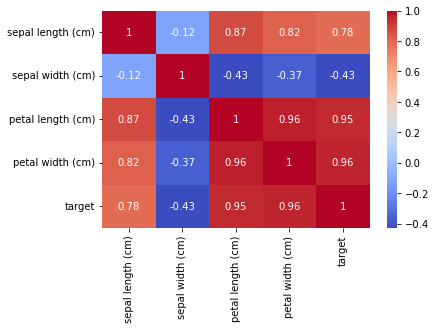

In [5]:
# Merge the features and the label to one DataFrame
df = pd.concat([X, y], axis=1) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.savefig('figures/iris_corr_heatmap.pdf', bbox_inches='tight')

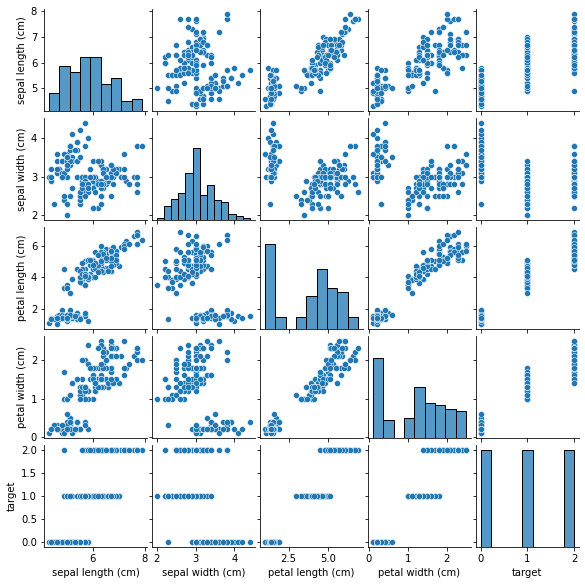

In [6]:
grid = sns.pairplot(df)
grid.fig.set_size_inches(8, 8)
plt.savefig('figures/iris_pairplot.pdf', bbox_inches='tight')

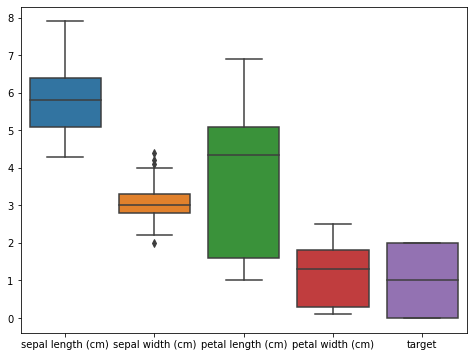

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.savefig('figures/iris_boxplot.pdf', bbox_inches='tight')

In [8]:
y.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

3. Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


4. Data preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
X_train_scaled[:5]

array([[ 0.01543995, -0.11925475,  0.22512685,  0.35579762],
       [-0.09984503, -1.04039491,  0.11355956, -0.02984109],
       [ 1.05300481, -0.11925475,  0.95031423,  1.12707506],
       [-1.36797986,  0.34131533, -1.39259884, -1.31530348],
       [ 1.1682898 ,  0.11103029,  0.72717965,  1.38416753]])

5. Choose a model

In [13]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

6. Train the model

In [14]:
clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [15]:
clf.coef_

array([[-1.02165072,  1.04304426, -1.77967589, -1.65948094],
       [ 0.54202301, -0.35993829, -0.26684495, -0.71829753],
       [ 0.47962771, -0.68310597,  2.04652083,  2.37777846]])

7. Evaluate the model on the training set

In [16]:
train_acc = clf.score(X_train_scaled, y_train)
print(f'Train accuracy: {train_acc:.4f}')

Train accuracy: 0.9732


8. Transform the test set

In [17]:
X_test_scaled = scaler.transform(X_test)

9. Evaluate the model on the test set

In [18]:
test_acc = clf.score(X_test_scaled, y_test)
print(f'Test accuracy: {test_acc:.4f}')

Test accuracy: 0.9737


10. Use the model for predictions.

In [19]:
new_sample = np.array([[5, 3, 1, 0.5]])
clf.predict(new_sample)

array([1])

Using a pipeline

In [20]:
from sklearn.pipeline import Pipeline

model = Pipeline([    
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [21]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

In [22]:
train_acc = model.score(X_train, y_train)
print(f'Train accuracy: {train_acc:.4f}')

test_acc = model.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

Train accuracy: 0.9732
Test accuracy: 0.9737


In [23]:
y_pred = model.predict([X_test.iloc[0]])
y_pred[0]

C:\Users\roi_y\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


2

In [24]:
y_test.iloc[0]

2

In [25]:
model.steps[1]

('clf', LogisticRegression())

In [26]:
model.named_steps['clf']

LogisticRegression()

In [27]:
model.set_params(clf__penalty='l1')

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(penalty='l1'))])